# Import Library 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Import Data

In [5]:
from sklearn.datasets import load_digits

In [6]:
df = load_digits()

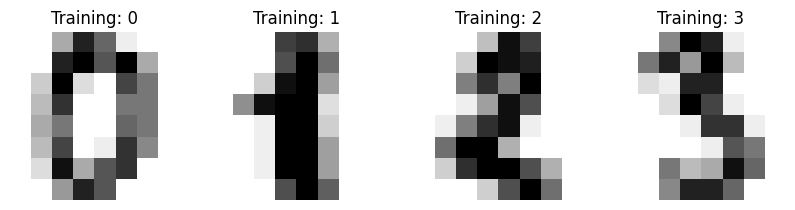

In [7]:
_, axes = plt.subplots(nrows =1 , ncols = 4 , figsize =(10,3))
for ax, image, label in zip(axes, df.images , df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r , interpolation = "nearest")
    ax.set_title("Training: %i" % label)

# Data preprocessing

In [8]:
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

In [14]:
n_samples =len(df.images)
data = df.images.reshape((n_samples, -1))

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [18]:
data.shape

(1797, 64)

# Scaling Image Data

In [19]:
data.min()

0.0

In [20]:
data.max()

16.0

In [21]:
data = data/16

In [23]:
data.min()

0.0

In [24]:
data.max()

1.0

In [25]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test split Data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test , y_train , y_test = train_test_split(data, df.target , test_size=0.3)

In [28]:
x_train.shape, x_test.shape , y_train.shape , y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf =RandomForestClassifier()

In [31]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# Predict Test Data

In [32]:
y_pred = rf.predict(x_test)

In [33]:
y_pred

array([0, 5, 5, 5, 9, 9, 4, 3, 6, 0, 3, 3, 0, 0, 2, 9, 6, 0, 8, 1, 3, 2,
       3, 2, 9, 4, 1, 4, 2, 7, 5, 7, 9, 1, 1, 7, 5, 7, 0, 4, 8, 3, 9, 0,
       7, 6, 2, 0, 7, 9, 0, 1, 1, 7, 2, 7, 3, 9, 5, 2, 8, 4, 9, 6, 0, 0,
       1, 7, 3, 2, 5, 6, 2, 5, 1, 6, 0, 6, 2, 5, 2, 2, 1, 4, 6, 3, 8, 6,
       5, 9, 8, 3, 9, 2, 8, 4, 0, 3, 8, 5, 0, 1, 0, 6, 7, 9, 0, 2, 9, 6,
       5, 6, 8, 5, 0, 4, 3, 6, 0, 8, 0, 5, 6, 2, 3, 8, 8, 6, 3, 8, 6, 8,
       1, 9, 9, 2, 9, 6, 8, 6, 4, 4, 2, 7, 3, 6, 6, 1, 7, 2, 4, 0, 7, 4,
       0, 5, 8, 0, 4, 3, 0, 4, 6, 3, 3, 9, 5, 8, 2, 0, 4, 2, 2, 0, 1, 0,
       5, 4, 1, 6, 4, 0, 7, 2, 1, 9, 0, 7, 9, 3, 8, 0, 2, 0, 4, 4, 9, 6,
       8, 6, 4, 2, 1, 2, 4, 9, 8, 4, 7, 2, 5, 3, 1, 2, 4, 7, 7, 4, 3, 4,
       9, 4, 3, 5, 9, 1, 1, 9, 9, 9, 3, 3, 6, 4, 8, 3, 1, 4, 4, 7, 1, 5,
       1, 6, 4, 8, 8, 2, 3, 9, 2, 2, 4, 7, 1, 6, 6, 4, 1, 1, 3, 5, 0, 1,
       3, 7, 9, 5, 9, 2, 8, 5, 4, 8, 3, 2, 7, 8, 9, 9, 5, 0, 5, 5, 4, 8,
       2, 2, 3, 9, 7, 1, 4, 6, 9, 7, 1, 7, 8, 6, 4,

# Model Accuracy 

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix(y_test , y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 56,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 56,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 65,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  2,  3],
       [ 1,  0,  0,  0,  0,  1, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 48,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 57]], dtype=int64)

In [37]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      1.00      1.00        42
           2       1.00      0.97      0.98        58
           3       0.98      0.97      0.97        58
           4       0.98      0.97      0.98        67
           5       0.98      0.91      0.94        55
           6       1.00      0.96      0.98        53
           7       0.98      0.98      0.98        56
           8       0.89      0.96      0.92        50
           9       0.90      0.98      0.94        58

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

